### Brazilian E-Commerce Public Dataset by Olist
This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

The code in the following cell downloads the dataset from Kagglehub and lists the files in the downloaded directory.

In [104]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# Download the latest version of the dataset
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

# List the files in the downloaded directory
file_list = os.listdir(path)
for file_name in file_list:
    print(file_name)

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [105]:
def detect_and_plot_outliers_iqr(df, column, exclude_zero=False):
    """
    Detects outliers using the IQR method, prints outlier information, and plots a box plot.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to analyze for outliers.
        exclude_zero (bool): Whether to exclude zero values from outlier calculation.
                             Useful for columns where zero is a meaningful non-outlier value.
    """
    print(f"\n--- Outlier Analysis for column: {column} ---")

    # Create box plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)
    plt.show()

    # Calculate IQR and identify outliers
    if exclude_zero:
        # Consider only non-zero values for IQR calculation
        data_for_iqr = df[df[column] != 0][column]
    else:
        data_for_iqr = df[column]

    if data_for_iqr.empty:
        print(f"  No non-zero data in column '{column}' to calculate outliers.")
        return

    Q1 = data_for_iqr.quantile(0.25)
    Q3 = data_for_iqr.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in the original DataFrame
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(df)) * 100

    print(f"  Number of outliers: {num_outliers}")
    print(f"  Percentage of outliers: {percentage_outliers:.2f}%")
    print(f"  Lower bound (IQR): {lower_bound:.2f}")
    print(f"  Upper bound (IQR): {upper_bound:.2f}")

    if num_outliers > 0 and num_outliers < 20: # Display if not too many outliers
        print("\nSample Outlier Rows:")
        display(outliers.head())

### Processing the `olist_customers_dataset.csv`, this includes checking for null/missing values, ensuring all datatypes are correctly assigned to the columns, checking for duplicate values and checking for outliers.

In [106]:
# Load the customers dataset
customers_dataset_path = os.path.join(path, "olist_customers_dataset.csv")
customers_df = pd.read_csv(customers_dataset_path)

# Display the first few rows of the DataFrame
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [107]:
# Get information about the customers_df DataFrame
print(customers_df.info())

# Display missing values information
print("\nMissing values in customers_df:")
print(customers_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Missing values in customers_df:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [108]:
# Checking for duplicated values
print(f"Duplicated values in customer_df: {customers_df.duplicated().sum()}")
print(f"Duplicated values in customer_df['customer_id']: {customers_df['customer_id'].duplicated().sum()}")

Duplicated values in customer_df: 0
Duplicated values in customer_df['customer_id']: 0


Numerical columns in customers_df: Index(['customer_zip_code_prefix'], dtype='object')

--- Outlier Analysis for column: customer_zip_code_prefix ---


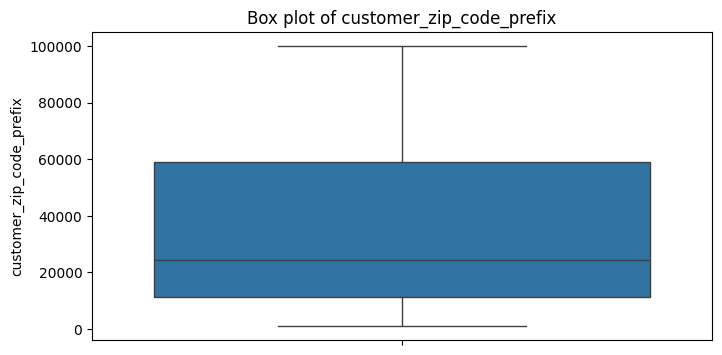

  Number of outliers: 0
  Percentage of outliers: 0.00%
  Lower bound (IQR): -59982.50
  Upper bound (IQR): 130229.50


In [109]:
# Identify numerical columns in customers_df
numerical_cols_customers = customers_df.select_dtypes(include=np.number).columns

print("Numerical columns in customers_df:", numerical_cols_customers)

# Apply outlier detection and plotting for each numerical column
for col in numerical_cols_customers:
    detect_and_plot_outliers_iqr(customers_df, col)

In [110]:
customers_df.to_parquet("olist_customers_cleaned_dataset.parquet", index=False)

Here are the key observations from the pre-processing of the `customers_df`:

*   **Missing Values:** No missing values were found in the dataset.
*   **Data Types:** All columns have been assigned appropriate data types.
*   **Duplicate Values:** There are no duplicate rows in the entire DataFrame or in the `customer_id` column. Duplicates in the `customer_unique_id` column are expected and represent repeat buyers, as explained in the dataset documentation.
*   **Row Uniqueness:** Each row represents a unique customer entry in this specific dataset instance.
*   **Key Identifiers:** `customer_id` serves as an anonymized link to orders, while `customer_unique_id` allows for tracking individual customers across multiple orders.
*   **Geographical Information:** The dataset includes `customer_city`, `customer_state`, and `customer_zip_code_prefix` for geographical analysis.
*   **Outliers:** No outliers were detected in the numerical column (`customer_zip_code_prefix`) using the IQR method.

### Processing the `olist_sellers_dataset.csv`, this includes checking for null/missing values, ensuring all datatypes are correctly assigned to the columns, checking for duplicate values and checking for outliers.

In [111]:
# Load the sellers dataset
seller_dataset_path = os.path.join(path, "olist_sellers_dataset.csv")
seller_df = pd.read_csv(seller_dataset_path)

# Display the first few rows of the DataFrame
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [112]:
# Get information about the seller_df DataFrame
print(seller_df.info())

# Display missing values information
print("\nMissing values in seller_df:")
print(seller_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Missing values in seller_df:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [113]:
# Checking for duplicated values
print(f"Duplicated values in seller_df: {seller_df.duplicated().sum()}")
print(f"Duplicated values in sellerer_df['seller_id']: {seller_df['seller_id'].duplicated().sum()}")

Duplicated values in seller_df: 0
Duplicated values in sellerer_df['seller_id']: 0


Numerical columns in seller_df: Index(['seller_zip_code_prefix'], dtype='object')

--- Outlier Analysis for column: seller_zip_code_prefix ---


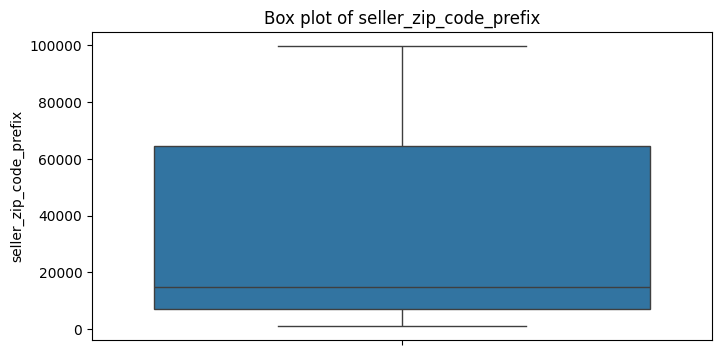

  Number of outliers: 0
  Percentage of outliers: 0.00%
  Lower bound (IQR): -79095.00
  Upper bound (IQR): 150741.00


In [114]:
# Identify numerical columns in seller_df
numerical_cols_sellers = seller_df.select_dtypes(include=np.number).columns

print("Numerical columns in seller_df:", numerical_cols_sellers)

# Apply outlier detection and plotting for each numerical column
for col in numerical_cols_sellers:
    detect_and_plot_outliers_iqr(seller_df, col)

In [115]:
seller_df.to_parquet("olist_sellers_cleaned_dataset.parquet", index=False)

Here are the key observations from the pre-processing of the `seller_df`:

*   **Missing Values and Data Types:** No missing values were detected, and all columns have appropriate data types.
*   **Duplicate Values:** There are no duplicate values present in the DataFrame, ensuring each entry is unique per seller.
*   **Row Uniqueness:** Each row corresponds to a unique seller identified by `seller_id`.
*   **Geographical Information:** The dataset includes `seller_zip_code_prefix`, `seller_city`, and `seller_state`, allowing for geographical analysis of seller distribution.
*   **Geographical Distribution:** The `seller_state` column indicates the Brazilian state where each seller is located, which is important for analyzing logistics and regional presence.
*   **Outliers:** No outliers were detected in the numerical column (`seller_zip_code_prefix`) using the IQR method.

### Processing the `olist_order_reviews_dataset.csv`, this includes checking for null/missing values, ensuring all datatypes are correctly assigned to the columns, checking for duplicate values and checking for outliers.

In [116]:
# Load the order reviews dataset
order_reviews_dataset_path = os.path.join(path, "olist_order_reviews_dataset.csv")
order_reviews_df = pd.read_csv(order_reviews_dataset_path)

# Display the first few rows of the DataFrame
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [117]:
# Get information about the order_reviews_df DataFrame
print(order_reviews_df.info())

# Display missing values information
print("\nMissing values in order_reviews_df:")
print(order_reviews_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Missing values in order_reviews_df:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [118]:
# Fill missing values in 'review_comment_title' and 'review_comment_message' with 'no comment'
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('no comment')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('no comment')

# Verify that missing values have been handled
print("\nMissing values in order_reviews_df after filling:")
print(order_reviews_df.isnull().sum())


Missing values in order_reviews_df after filling:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [119]:
# Datatype mismatch
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])

print(f"Datatype after being handled carefully: \n{order_reviews_df.dtypes}")

Datatype after being handled carefully: 
review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


In [120]:
# Duplicated Values
print(f"Duplicated values in order_reviews_df: {order_reviews_df.duplicated().sum()}")
print(f"Duplicated values in order_reviews_df['review_id']: {order_reviews_df['review_id'].duplicated().sum()}")
# Remove duplicate review_id values from order_reviews_df
order_reviews_df.drop_duplicates(subset='review_id', inplace=True)

# Verify that duplicates have been removed
print(f"Duplicated values in order_reviews_df['review_id'] after removing duplicates: {order_reviews_df['review_id'].duplicated().sum()}")

Duplicated values in order_reviews_df: 0
Duplicated values in order_reviews_df['review_id']: 814
Duplicated values in order_reviews_df['review_id'] after removing duplicates: 0


Numerical columns in seller_df: Index(['review_score'], dtype='object')

--- Outlier Analysis for column: review_score ---


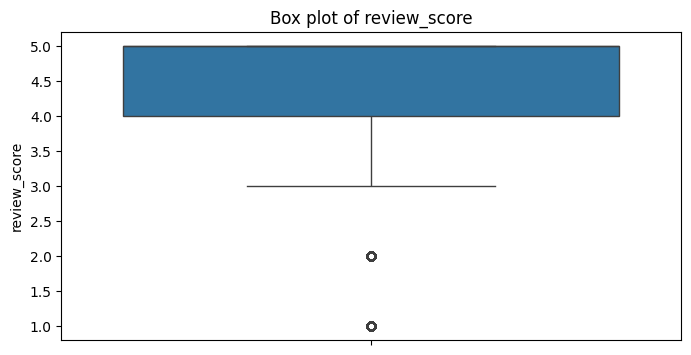

  Number of outliers: 14396
  Percentage of outliers: 14.63%
  Lower bound (IQR): 2.50
  Upper bound (IQR): 6.50


In [121]:
# Identify numerical columns in seller_df
numerical_cols_sellers = order_reviews_df.select_dtypes(include=np.number).columns

print("Numerical columns in seller_df:", numerical_cols_sellers)

# Apply outlier detection and plotting for each numerical column
for col in numerical_cols_sellers:
    detect_and_plot_outliers_iqr(order_reviews_df, col)

In [122]:
order_reviews_df.to_parquet("olist_order_reviews_cleaned_dataset.parquet", index=False)

Observations:
* Each row corresponds to exactly one review per order.
* review_score ranges from 1 to 5, with most orders having a rating.
* Many reviews lack textual comments (review_comment_title and review_comment_message have many nulls) which were later replaced by 'no comment' string.
* Review timestamps (review_creation_date, review_answer_timestamp) are stored as objects and will need datetime conversion for time series analysis.
* we found that there are 814 duplicated values in the review_id.
* This dataset can provide insights on customer satisfaction and correlate ratings with delivery times, sellers, or product categories during EDA.
* Number of outliers: 14396, but these outliers are part of rating which are given my customers and it can be highly negative or highly positive but these are essential for the ML.

### Processing the `olist_order_items_dataset.csv`, this includes checking for null/missing values, ensuring all datatypes are correctly assigned to the columns, checking for duplicate values and checking for outliers.

In [123]:
# Load the order items dataset
order_items_dataset_path = os.path.join(path, "olist_order_items_dataset.csv")
order_items_df = pd.read_csv(order_items_dataset_path)

# Display the first few rows of the DataFrame
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [124]:
# Get information about the order_items_df DataFrame
print(order_items_df.info())

# Display missing values information
print("\nMissing values in order_items_df:")
print(order_items_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Missing values in order_items_df:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [125]:
order_items_df.rename(columns={"shipping_limit_date" : "shipping_deadline"}, inplace=True)
order_items_df['shipping_deadline'] = pd.to_datetime(order_items_df['shipping_deadline'])
print(f"Datatype after being handled carefully: \n{order_items_df.dtypes}")

Datatype after being handled carefully: 
order_id                     object
order_item_id                 int64
product_id                   object
seller_id                    object
shipping_deadline    datetime64[ns]
price                       float64
freight_value               float64
dtype: object


In [126]:
# Duplicated Values
print(f"Duplicated values in order_reviews_df: {order_items_df.duplicated().sum()}")
print(f"Checking duplicates in the combination of order_id, item_is: {order_items_df.duplicated(subset=['order_id', 'order_item_id']).sum()}")

Duplicated values in order_reviews_df: 0
Checking duplicates in the combination of order_id, item_is: 0


Numerical columns in order_items_df: Index(['order_item_id', 'price', 'freight_value'], dtype='object')

--- Outlier Analysis for column: price ---


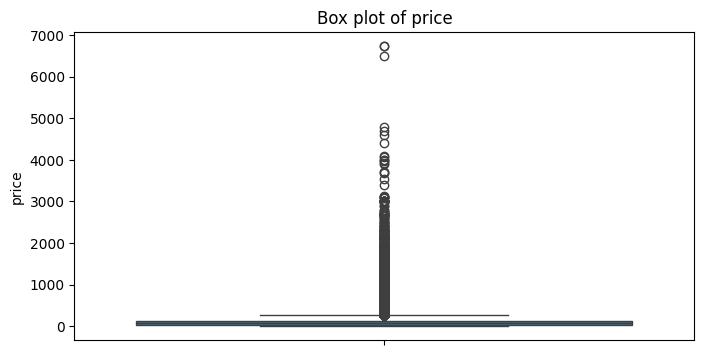

  Number of outliers: 8427
  Percentage of outliers: 7.48%
  Lower bound (IQR): -102.60
  Upper bound (IQR): 277.40

--- Outlier Analysis for column: freight_value ---


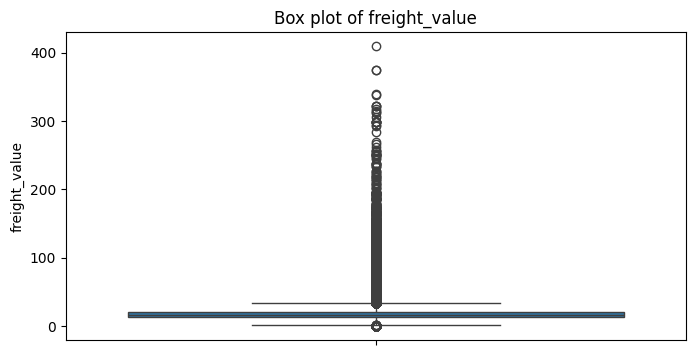

  Number of outliers: 12134
  Percentage of outliers: 10.77%
  Lower bound (IQR): 0.98
  Upper bound (IQR): 33.25


In [127]:
# Identify numerical columns in order_items_df
numerical_cols_items = order_items_df.select_dtypes(include=np.number).columns

print("Numerical columns in order_items_df:", numerical_cols_items)

# Apply outlier detection and plotting for each numerical column
for col in numerical_cols_items:
    if col == 'order_item_id': # Exclude order_item_id from outlier detection
      continue
    detect_and_plot_outliers_iqr(order_items_df, col)

In [128]:
# Let's find the outliers without removing them first
# Select only numerical columns for quantile calculation
numerical_order_items_df = order_items_df.select_dtypes(include=np.number)

Q1 = numerical_order_items_df.quantile(0.25)
Q3 = numerical_order_items_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for 'price' and 'freight_value' using their specific bounds
outliers_price = order_items_df[(order_items_df['price'] < lower_bound['price']) | (order_items_df['price'] > upper_bound['price'])]
outliers_freight = order_items_df[(order_items_df['freight_value'] < lower_bound['freight_value']) | (order_items_df['freight_value'] > upper_bound['freight_value'])]

print("--- Top 5 Price Outliers ---")
display(outliers_price.sort_values('price', ascending=False).head())

print("\n--- Top 5 Freight Value Outliers ---")
display(outliers_freight.sort_values('freight_value', ascending=False).head())

--- Top 5 Price Outliers ---


,order_id,order_item_id,product_id,seller_id,shipping_deadline,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34



--- Top 5 Freight Value Outliers ---


,order_id,order_item_id,product_id,seller_id,shipping_deadline,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68
28044,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28
3303,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28
69797,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59
16731,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30


Log-transformed columns 'price_log' and 'freight_value_log' have been created.


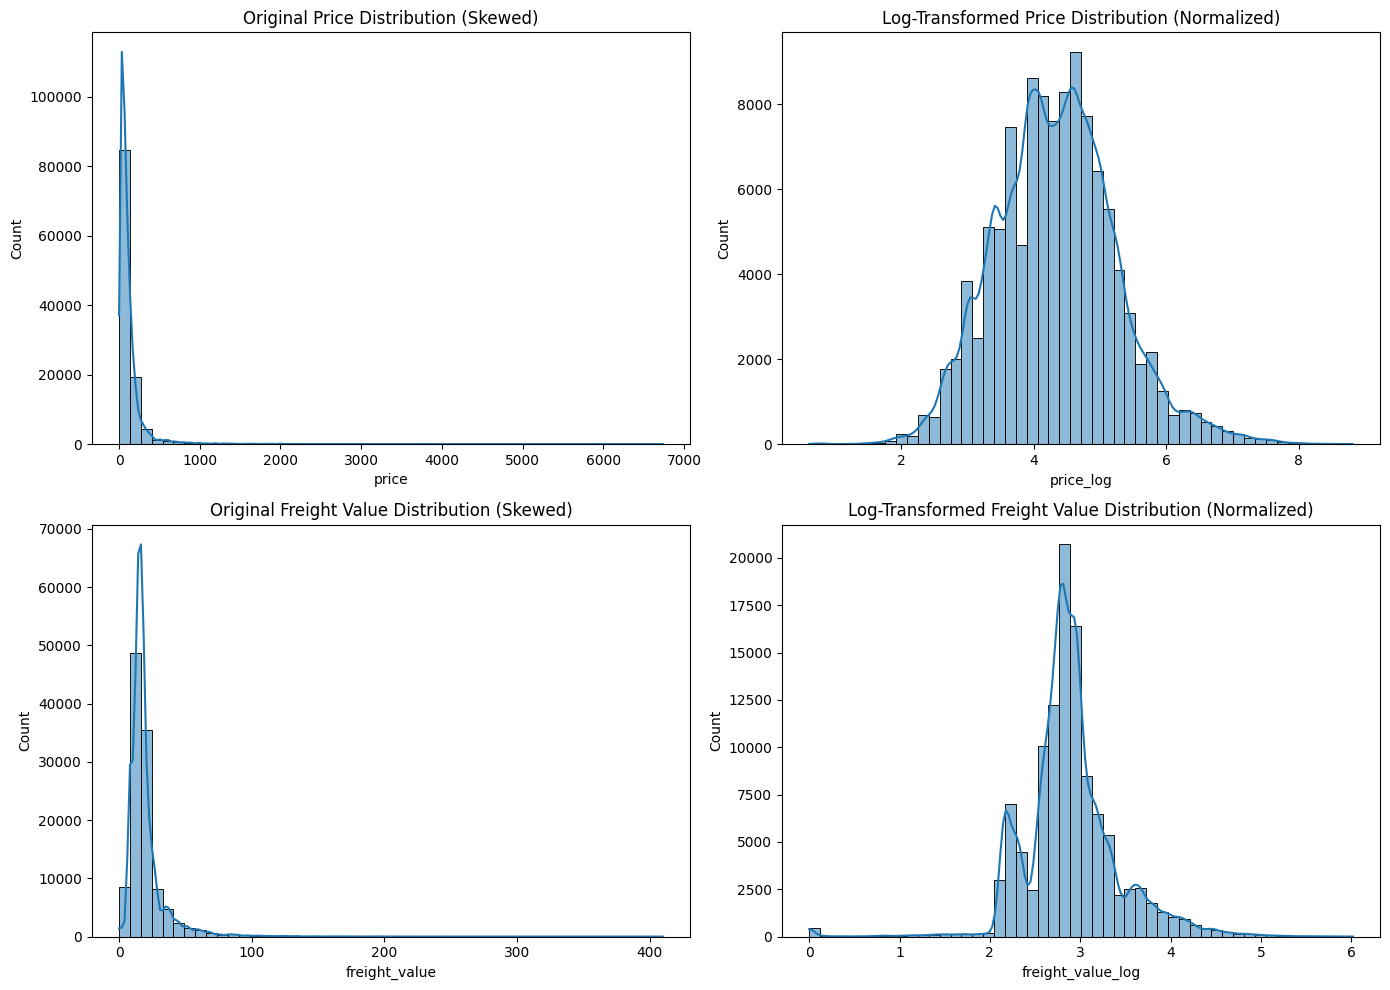

In [129]:
order_items_df['price_log'] = np.log1p(order_items_df['price'])
order_items_df['freight_value_log'] = np.log1p(order_items_df['freight_value'])

print("Log-transformed columns 'price_log' and 'freight_value_log' have been created.")


# --- Step 2: Visualize the "Before and After" ---
# This will clearly show you why this method is so effective.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original distributions
sns.histplot(order_items_df['price'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Price Distribution (Skewed)')

sns.histplot(order_items_df['freight_value'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Original Freight Value Distribution (Skewed)')

# Log-transformed distributions
sns.histplot(order_items_df['price_log'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Log-Transformed Price Distribution (Normalized)')

sns.histplot(order_items_df['freight_value_log'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Log-Transformed Freight Value Distribution (Normalized)')

plt.tight_layout()
plt.show()

In [130]:
order_reviews_df.to_parquet("olist_order_items_cleaned_dataset.parquet", index=False)

Observations
* No missing values detected in this dataset.
* Each row represents an individual product item in an order:
* An order can have multiple rows (one per product).
* order_item_id is not a unique identifier by itself, but it helps identify the position of an item within a given order_id.
* price and freight_value will be critical for revenue and cost analysis in the EDA stage.
* Multiple outliers were identified in the price and freight_value but exactly they were the prices of the high-end/expensives products so we cannot remove it but in order to normalize it we transformed it using the logarithmic tranformation.

### Processing the `olist_products_dataset.csv`, this includes checking for null/missing values, ensuring all datatypes are correctly assigned to the columns, checking for duplicate values and checking for outliers.

In [131]:
# Load the products dataset
products_dataset_path = os.path.join(path, "olist_products_dataset.csv")
products_df = pd.read_csv(products_dataset_path)

# Display the first few rows of the DataFrame
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [132]:
# Get information about the products_df DataFrame
print(products_df.info())

# Display missing values information
print("\nMissing values in products_df:")
print(products_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Missing values in products_df:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
produc

In [133]:
products_df.rename(columns={
    "product_name_lenght" : "product_name_length",
    "product_description_lenght" : "product_description_length"
}, inplace=True)

In [134]:
# Fill missing values in 'product_category_name' with 'unknown'
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')

# Verify that missing values in 'product_category_name' have been handled
print("\nMissing values in products_df after filling 'product_category_name':")
print(products_df.isnull().sum())


Missing values in products_df after filling 'product_category_name':
product_id                      0
product_category_name           0
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [135]:
# Calculate the median of 'product_name_length', 'product_description_length', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', and 'product_width_cm'
median_name_length = products_df['product_name_length'].median()
median_description_length = products_df['product_description_length'].median()
median_photos_qty = products_df['product_photos_qty'].median()
median_weight_g = products_df['product_weight_g'].median()
median_length_cm = products_df['product_length_cm'].median()
median_height_cm = products_df['product_height_cm'].median()
median_width_cm = products_df['product_width_cm'].median()


# Impute missing values in 'product_name_length', 'product_description_length', and 'product_photos_qty' with their medians
products_df['product_name_length'] = products_df['product_name_length'].fillna(median_name_length)
products_df['product_description_length'] = products_df['product_description_length'].fillna(median_description_length)
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(median_photos_qty)

# Impute missing values in 'product_weight_g', 'product_length_cm', 'product_height_cm', and 'product_width_cm' with their medians
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(median_weight_g)
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(median_length_cm)
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(median_height_cm)
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(median_width_cm)


# Verify that missing values in 'product_name_length' have been handled
print("\nMissing values in products_df after imputing numerical columns:")
print(products_df.isnull().sum())


Missing values in products_df after imputing numerical columns:
product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [136]:
# Duplicated Values
print(f"Duplicated values in order_reviews_df: {products_df.duplicated().sum()}")
print(f"Duplicated values in order_reviews_df['product_id']: {products_df['product_id'].duplicated().sum()}")

Duplicated values in order_reviews_df: 0
Duplicated values in order_reviews_df['product_id']: 0


Numerical columns in order_items_df: Index(['product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

--- Outlier Analysis for column: product_name_length ---


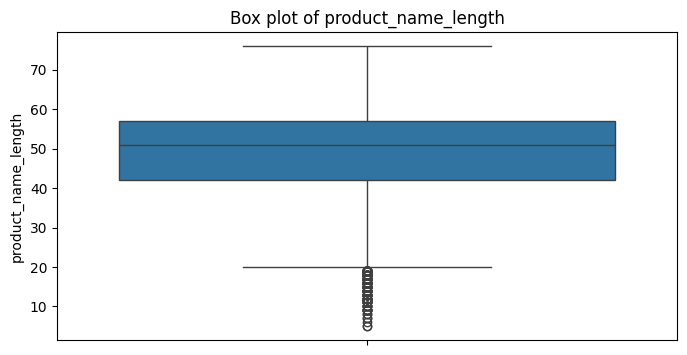

  Number of outliers: 290
  Percentage of outliers: 0.88%
  Lower bound (IQR): 19.50
  Upper bound (IQR): 79.50

--- Outlier Analysis for column: product_description_length ---


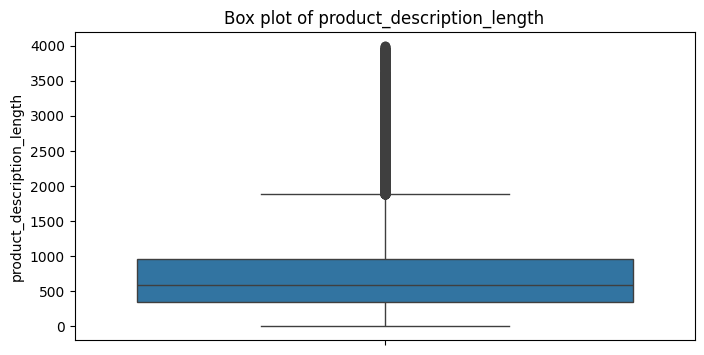

  Number of outliers: 2174
  Percentage of outliers: 6.60%
  Lower bound (IQR): -581.50
  Upper bound (IQR): 1886.50

--- Outlier Analysis for column: product_photos_qty ---


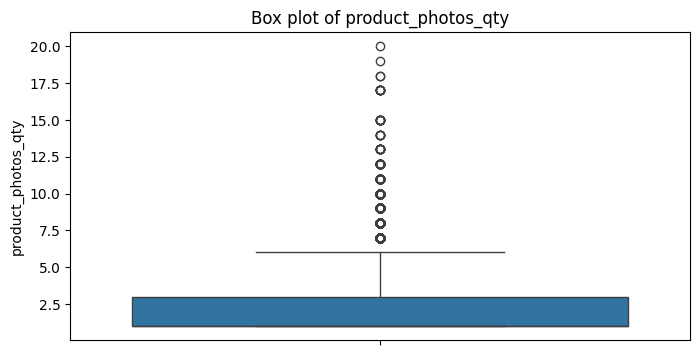

  Number of outliers: 849
  Percentage of outliers: 2.58%
  Lower bound (IQR): -2.00
  Upper bound (IQR): 6.00

--- Outlier Analysis for column: product_weight_g ---


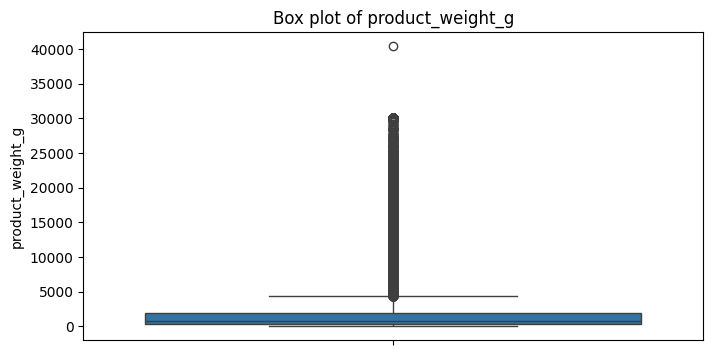

  Number of outliers: 4551
  Percentage of outliers: 13.81%
  Lower bound (IQR): -2100.00
  Upper bound (IQR): 4300.00

--- Outlier Analysis for column: product_length_cm ---


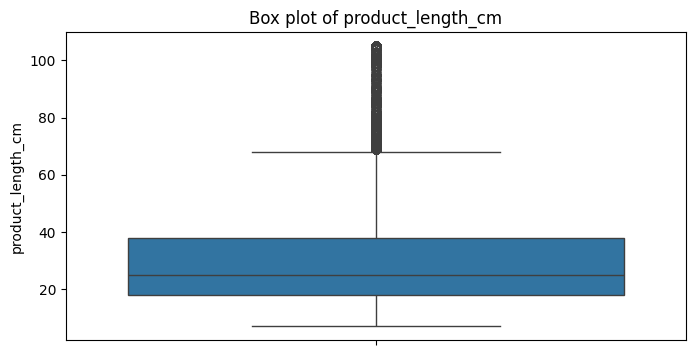

  Number of outliers: 1380
  Percentage of outliers: 4.19%
  Lower bound (IQR): -12.00
  Upper bound (IQR): 68.00

--- Outlier Analysis for column: product_height_cm ---


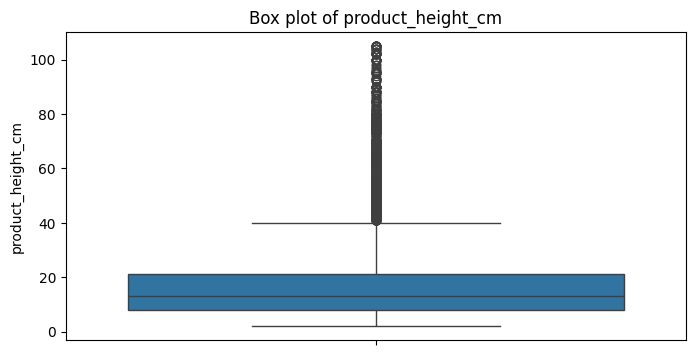

  Number of outliers: 1892
  Percentage of outliers: 5.74%
  Lower bound (IQR): -11.50
  Upper bound (IQR): 40.50

--- Outlier Analysis for column: product_width_cm ---


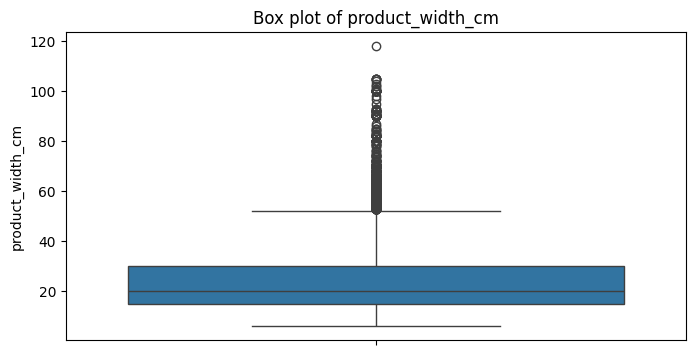

  Number of outliers: 912
  Percentage of outliers: 2.77%
  Lower bound (IQR): -7.50
  Upper bound (IQR): 52.50


In [137]:
# Identify numerical columns in order_items_df
numerical_cols_items = products_df.select_dtypes(include=np.number).columns

print("Numerical columns in order_items_df:", numerical_cols_items)

# Apply outlier detection and plotting for each numerical column
for col in numerical_cols_items:
    detect_and_plot_outliers_iqr(products_df, col)

In [138]:
products_df['product_weight_g_log'] = np.log1p(products_df['product_weight_g'])

# Optional but recommended: Create and transform volume
products_df['product_volume_cm3'] = products_df['product_length_cm'] * products_df['product_height_cm'] * products_df['product_width_cm']
products_df['product_volume_cm3_log'] = np.log1p(products_df['product_volume_cm3'])

print("Log-transformed columns for weight and volume have been created.")

# --- 2. Cap the Product Description Length ---
# Calculate the 99th percentile
desc_len_cap = products_df['product_description_length'].quantile(0.99)
print(f"Product description length will be capped at: {desc_len_cap:.0f} characters.")

# Create a new capped column
products_df['product_description_length_capped'] = products_df['product_description_length'].clip(upper=desc_len_cap)

print("Capped column for description length has been created.")

# --- 3. Do Nothing for Photos Qty and Name Length ---
print("No changes made to 'product_photos_qty' or 'product_name_length'.")

# Display the new columns
print("\nDataFrame with new transformed/capped columns:")
display(products_df[['product_weight_g', 'product_weight_g_log', 'product_volume_cm3', 'product_volume_cm3_log', 'product_description_length', 'product_description_length_capped']].head())


Log-transformed columns for weight and volume have been created.
Product description length will be capped at: 3274 characters.
Capped column for description length has been created.
No changes made to 'product_photos_qty' or 'product_name_length'.

DataFrame with new transformed/capped columns:


,product_weight_g,product_weight_g_log,product_volume_cm3,product_volume_cm3_log,product_description_length,product_description_length_capped
0,225.0,5.420535,2240.0,7.714677,287.0,287.0
1,1000.0,6.908755,10800.0,9.287394,276.0,276.0
2,154.0,5.043425,2430.0,7.796058,250.0,250.0
3,371.0,5.918894,2704.0,7.902857,261.0,261.0
4,625.0,6.439350,4420.0,8.394121,402.0,402.0


In [147]:
order_reviews_df.to_parquet("olist_products_cleaned_dataset.parquet", index=False)

Observations
* The dataset includes product identifiers, product categories (in Portuguese), and physical attributes such as length, height, width, and weight.
* Around 1.85% of entries have missing values in category and product description-related columns, should be addressed by filling it with either unknown or with median values.
* Only a negligible number of missing values are present in the physical dimension columns.
* Some products share the same category ID, which will be translated into English using the product_category dataset.
* Product dimensions and weight will be valuable for analyzing shipping costs and understanding product characteristics in later EDA.

### Processing the `olist_geolocation_dataset.csv`, this includes checking for null/missing values, ensuring all datatypes are correctly assigned to the columns, checking for duplicate values and checking for outliers.

In [140]:
# Load the geolocation dataset
geolocation_dataset_path = os.path.join(path, "olist_geolocation_dataset.csv")
geolocation_df = pd.read_csv(geolocation_dataset_path)

# Display the first few rows of the DataFrame
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [141]:
# Get information about the geolocation_df DataFrame
geolocation_df_info = geolocation_df.info()

# Display missing values information
print("\nMissing values in geolocation_df:")
print(geolocation_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Missing values in geolocation_df:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [142]:
# Check for duplicated rows in the geolocation_df
print(f"Number of duplicated rows in geolocation_df: {geolocation_df.duplicated().sum()}")

Number of duplicated rows in geolocation_df: 261831


In [143]:
# Remove duplicate rows based on the subset of specified columns
geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'], keep='first', inplace=True)

# Verify that duplicates based on the subset have been removed
print(f"Number of duplicated rows based on zip code, lat, and lng after removing duplicates: {geolocation_df.duplicated(subset=['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']).sum()}")

Number of duplicated rows based on zip code, lat, and lng after removing duplicates: 0


In [ ]:
# Identify numerical columns in order_items_df
numerical_cols_items = geolocation_df.select_dtypes(include=np.number).columns

print("Numerical columns in order_items_df:", numerical_cols_items)

# Apply outlier detection and plotting for each numerical column
for col in numerical_cols_items:
    detect_and_plot_outliers_iqr(geolocation_df, col)

In [ ]:
# Define the approximate geographical boundaries for Brazil
LAT_MIN, LAT_MAX = -34, 6
LON_MIN, LON_MAX = -74, -34

# Find coordinates that fall outside these boundaries
geo_outliers = geolocation_df[
    (geolocation_df['geolocation_lat'] < LAT_MIN) | (geolocation_df['geolocation_lat'] > LAT_MAX) |
    (geolocation_df['geolocation_lng'] < LON_MIN) | (geolocation_df['geolocation_lng'] > LON_MAX)
]

num_outliers = len(geo_outliers)

if num_outliers > 0:
    print(f"--- Geographic Outlier Analysis ---")
    print(f"Found {num_outliers} coordinates outside the plausible boundaries of Brazil.")
    print("\nDisplaying some of the detected outliers:")
    display(geo_outliers)

    geolocation_df_cleaned = geolocation_df.drop(geo_outliers.index)
    print(f"\n{num_outliers} outlier rows have been removed.")

else:
    print("No geographic outliers found outside the plausible boundaries of Brazil.")


In [146]:
order_reviews_df.to_parquet("olist_geolocation_cleaned_dataset.parquet", index=False)

Observations:
* Each zip code prefix is associated with one city and one state.
* This dataset enables mapping customer and seller locations geographically.
* Unique states provide insights into regional coverage and potential logistics challenges.

### Processing the `product_category_name_translation_dataset.csv`, this includes checking for null/missing values, ensuring all datatypes are correctly assigned to the columns, checking for duplicate values and checking for outliers.

In [148]:
# Load the product category name translation dataset
category_name_translation_dataset_path = os.path.join(path, "product_category_name_translation.csv")
category_name_translation_df = pd.read_csv(category_name_translation_dataset_path)

# Display the entire DataFrame
category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Get information about the category_name_translation_df DataFrame
print(category_name_translation_df.info())

# Display missing values information
print("\nMissing values in category_name_translation_df:")
print(category_name_translation_df.isnull().sum())

In [ ]:
print(f"Duplicated values in category_name_translation_df: {category_name_translation_df.duplicated().sum()}")
print(f"Duplicated values in category_name_translation_df['product_category_name']: {category_name_translation_df['product_category_name'].duplicated().sum()}")

In [149]:
order_reviews_df.to_parquet("category_name_translation_cleaned_dataset.parquet", index=False)

Observations:
* The dataset contains two columns: the original Portuguese category names and their English translations.
* There are no missing values and duplicate values.
* This will allow us to join with the products dataset to translate product categories for better readability in analysis.

### Processing the `olist_orders_dataset.csv`, this includes checking for null/missing values, ensuring all datatypes are correctly assigned to the columns, checking for duplicate values and checking for outliers.

In [ ]:
# Load the orders dataset
orders_dataset_path = os.path.join(path, "olist_orders_dataset.csv")
orders_df = pd.read_csv(orders_dataset_path)

# Display the first few rows of the DataFrame
orders_df.head()